# [복습] 자동완성 끄고 아이리스 시각화, 전처리, 모델 구현, 성능평가

### 타겟 : species
### 피쳐 : sepal_length, sepal_width, petal_length, petal_width

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_file = '../data/iris.csv'
irisDF = pd.read_csv(data_file)
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
irisDF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
irisDF.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
a = irisDF.duplicated().sum()
b = irisDF.isna().sum()
c = irisDF.isnull().sum()
print(f'{a}\n\n{b}\n\n{c}')

3

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
irisDF = irisDF.drop_duplicates(ignore_index=True)
irisDF.index

RangeIndex(start=0, stop=147, step=1)

In [10]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,virginica
143,6.3,2.5,5.0,1.9,virginica
144,6.5,3.0,5.2,2.0,virginica
145,6.2,3.4,5.4,2.3,virginica


In [11]:
targetDF = irisDF.species
featureDF = irisDF[irisDF.columns[:-1]]
# featureDF
targetDF

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
Name: species, Length: 147, dtype: object

In [12]:
setosaDF = irisDF[irisDF['species']=='setosa']
versicolorDF = irisDF[irisDF['species']=='versicolor']
virginicaDF = irisDF[irisDF['species']=='virginica']
virginicaDF

,sepal_length,sepal_width,petal_length,petal_width,species
98,6.3,3.3,6.0,2.5,virginica
99,5.8,2.7,5.1,1.9,virginica
100,7.1,3.0,5.9,2.1,virginica
101,6.3,2.9,5.6,1.8,virginica
102,6.5,3.0,5.8,2.2,virginica
103,7.6,3.0,6.6,2.1,virginica
104,4.9,2.5,4.5,1.7,virginica
105,7.3,2.9,6.3,1.8,virginica
106,6.7,2.5,5.8,1.8,virginica
107,7.2,3.6,6.1,2.5,virginica


In [13]:
corrDF = featureDF.corr
corrDF

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
142           6.7          3.0           5.2          2.3
143           6.3          2.5           5.0          1.9
144           6.5          3.0           5.2          2.0
145           6.2          3.4           5.4          2.3
146           5.9          3.0           5.1          1.8

[147 rows x 4 columns]>

In [14]:
import seaborn as sns

<Axes: >

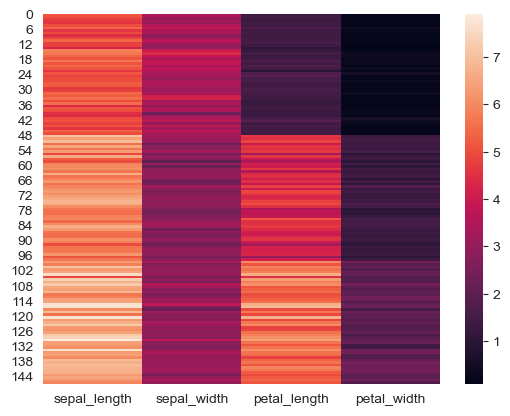

In [15]:
sns.heatmap(featureDF)

<Axes: >

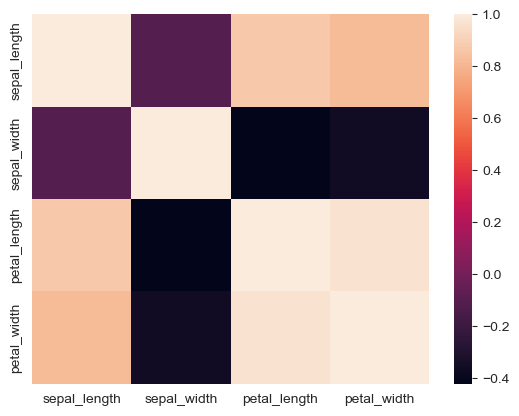

In [16]:
sns.heatmap(featureDF.corr())

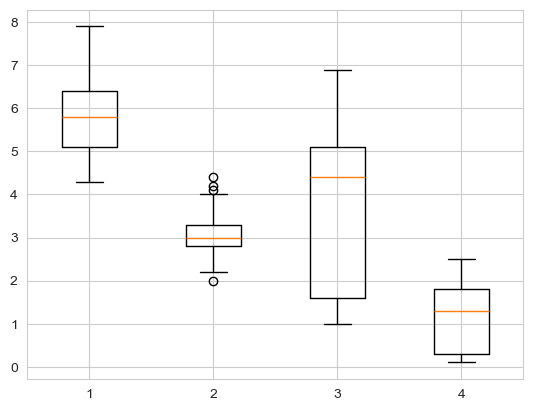

In [17]:
plt.boxplot(featureDF)
plt.show()

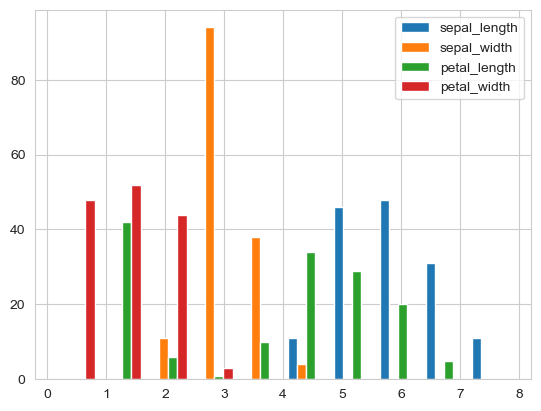

In [18]:
plt.hist(featureDF, label=featureDF.columns)
plt.legend()
plt.show()

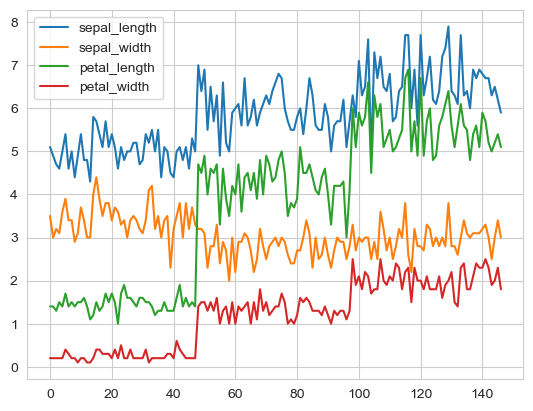

In [19]:
plt.plot(featureDF, label = featureDF.columns)
plt.legend()
plt.show()

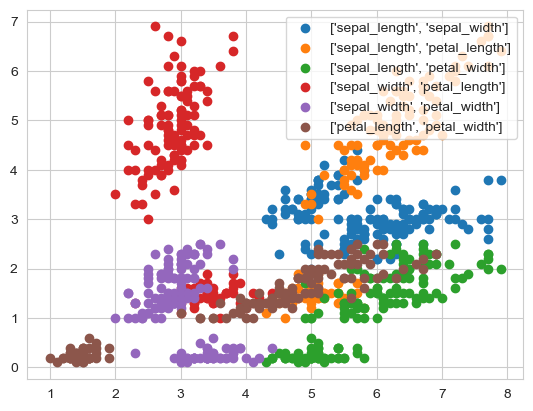

In [20]:
from itertools import combinations

combi = combinations([0,1,2,3],2)
for c in combi:
    # print(c)
    plt.scatter(featureDF[featureDF.columns[c[0]]], featureDF[featureDF.columns[c[1]]], label=[featureDF.columns[c[0]], featureDF.columns[c[1]]])
plt.legend()
plt.show()

## 여기 파트 import 외우기

In [21]:
targetDFCa= targetDF.replace({'setosa':0, 'versicolor':1, 'virginica':2})
targetDFCa

0      0
1      0
2      0
3      0
4      0
      ..
142    2
143    2
144    2
145    2
146    2
Name: species, Length: 147, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDFCa,
                                                    random_state=7,
                                                    test_size=0.3)

In [23]:
targetDFCa.unique()

array([0, 1, 2])

In [37]:
ScalerList = [StandardScaler(), MinMaxScaler(), RobustScaler(), PolynomialFeatures()]
modelList = [KNeighborsClassifier(), KNeighborsRegressor(), LinearRegression(), LogisticRegression(solver='liblinear')]
OVList = [OneVsOneClassifier, OneVsRestClassifier]
def ML(n, TF):
    for idx, scaler in enumerate(ScalerList):
        if idx == 3:
            poly = PolynomialFeatures(degree=n, include_bias=TF)
            train = poly.fit_transform(X_train)
            test = poly.transform(x_test)
        else:
            scaler.fit(X_train)
            train = scaler.transform(X_train)
            test = scaler.transform(x_test)
        
        for idx3, ov in enumerate(OVList):
            for idx2, m in enumerate(modelList):
                if idx3==1 and idx2 in [1,2]:
                    continue
                else:
                    model=m
                    if idx2 in [0,3]:
                        model = ov(m)
                    # elif idx3==1 and idx2 in [0,3]:
                    #     continue
                            
                    model.fit(train, y_train)
                    modelScore = model.score(train, y_train)
                    testScore = model.score(test, y_test)
                    if idx2 in [0,3]:
                        print(f'{idx+1}-{idx2+1}-{idx3+1}) {scaler} {m} {ov.__name__} \n\tmodel score : {modelScore:.3f}, \ttest score : {testScore:.3f}', end='')
                    else:
                        print(f'{idx+1}-{idx2+1}) {scaler} {m} \n\tmodel score : {modelScore:.3f}, \ttest score : {testScore:.3f}', end='')
                        
                    if modelScore < 0.5 and testScore < 0.5 :
                        print(' (과소적합)')
                    elif modelScore > testScore :
                        print(' (과대적합)')
                    else:
                        print()
                    y_pre = model.predict(train)
                    r2 = r2_score(y_train, y_pre)
                    mse = mean_squared_error(y_train, y_pre)
                    rmse = mean_squared_error(y_train, y_pre, squared=False)
                    mae = mean_absolute_error(y_train, y_pre)
                    
                    print(f'\tR2 : {r2:.3f}, MSE : {mse:.3f}, RMSE : {rmse:.3f}, MAE : {mae:.3f}\n')
        
ML(5,False)


1-1-1) StandardScaler() KNeighborsClassifier() OneVsOneClassifier 
	model score : 0.990, 	test score : 0.911 (과대적합)
	R2 : 0.985, MSE : 0.010, RMSE : 0.099, MAE : 0.010

1-2) StandardScaler() KNeighborsRegressor() 
	model score : 0.980, 	test score : 0.916 (과대적합)
	R2 : 0.980, MSE : 0.013, RMSE : 0.114, MAE : 0.033

1-3) StandardScaler() LinearRegression() 
	model score : 0.941, 	test score : 0.890 (과대적합)
	R2 : 0.941, MSE : 0.038, RMSE : 0.196, MAE : 0.146

1-4-1) StandardScaler() LogisticRegression(solver='liblinear') OneVsOneClassifier 
	model score : 0.971, 	test score : 0.911 (과대적합)
	R2 : 0.955, MSE : 0.029, RMSE : 0.171, MAE : 0.029

1-1-2) StandardScaler() KNeighborsClassifier() OneVsRestClassifier 
	model score : 0.990, 	test score : 0.911 (과대적합)
	R2 : 0.985, MSE : 0.010, RMSE : 0.099, MAE : 0.010

1-4-2) StandardScaler() LogisticRegression(solver='liblinear') OneVsRestClassifier 
	model score : 0.922, 	test score : 0.911 (과대적합)
	R2 : 0.880, MSE : 0.078, RMSE : 0.280, MAE : 0.078


## 오류행렬 이용하기
## 최종결과물 DF 출력 고민하기